In [3]:
import nibabel as nib
import numpy as np

# pred = nib.load('alg_out/Task001_LiverTumor/DiceTopK10/train_201.nii.gz').get_fdata()
# pred2 = nib.load('alg_out/Task001_LiverTumor/CE/train_201.nii.gz').get_fdata()

import metric
import plotui
import os,compress_pickle
mme=metric.MME(2)
pcf='precompute/tmp.pkl.lz4'
if 0 or not os.path.isfile(pcf):
    print('precompute start')
    gt = nib.load('alg_out/Task001_LiverTumor/GroundTruth/train_101.nii.gz')
    from nibabel.affines import voxel_sizes
    
    compress_pickle.dump(mme.precompute(gt.get_fdata(),spacing=voxel_sizes(gt.affine)), pcf)
    print('precompute finsihed')
helper= compress_pickle.load(pcf)
print('precompute loaded')
helperc=helper['class'][1]
# plotui.plot_voxels(helperc['components'][1]['gt_border_dst'],'a.html',show=True)
# x=helperc['components'][1]['gt_in_dst']
import plotly.express as px
import plotly.graph_objects as go
rng=np.s_[...,np.s_[13:190]]
from plotly.subplots import make_subplots


import math
keys=['gt','gt_skeleton','gt_border','gt_skeleton_dst','gt_in_dst','gt_out_dst','skgt_normalized_dst_in','skgt_normalized_dst_out','skgt_normalized_dst']

f={}
for k in keys:
    x=helperc['components'][1][k][rng]
    x[x>10]=0
    # f[k]= np.clip(x,0,5)/min(5,x.max())
    f[k]= x/x.max()
    

# import myutils
# data=np.array(list(f.values()))
# data=myutils.array_trim(data,ignore=[0])
# fig=px.imshow(data,animation_frame=3,facet_col=0, )
# for i, key in enumerate(keys):
#     fig.layout.annotations[i]['text'] = key
# # fig.write_html('a.html')
# fig.show()
# fig = make_subplots(rows=1, cols=3)
# fig.add_trace(px.imshow(helperc['components'][1]['gt'][rng]*255).data[0],row=1,col=1)
# fig.add_trace(px.imshow(helperc['components'][1]['gt_skeleton_dst'][rng]).data[0],row=1,col=1)
# fig.add_trace(px.imshow(helperc['components'][1]['gt_out_dst'][rng]).data[0],row=1,col=3)
# px.imshow(helperc['components'][1]['gt_border'][rng])
# fig.add_trace(go.Contour(z=helperc['components'][1]['gt_border'][rng], showscale=False,line_width=2))

precompute start
precompute finsihed
precompute loaded


/tmp/ipykernel_1894881/1373813411.py:38: RuntimeWarning: invalid value encountered in divide
  f[k]= x/x.max()


In [4]:
pip install auto_profiler

Note: you may need to restart the kernel to use updated packages.


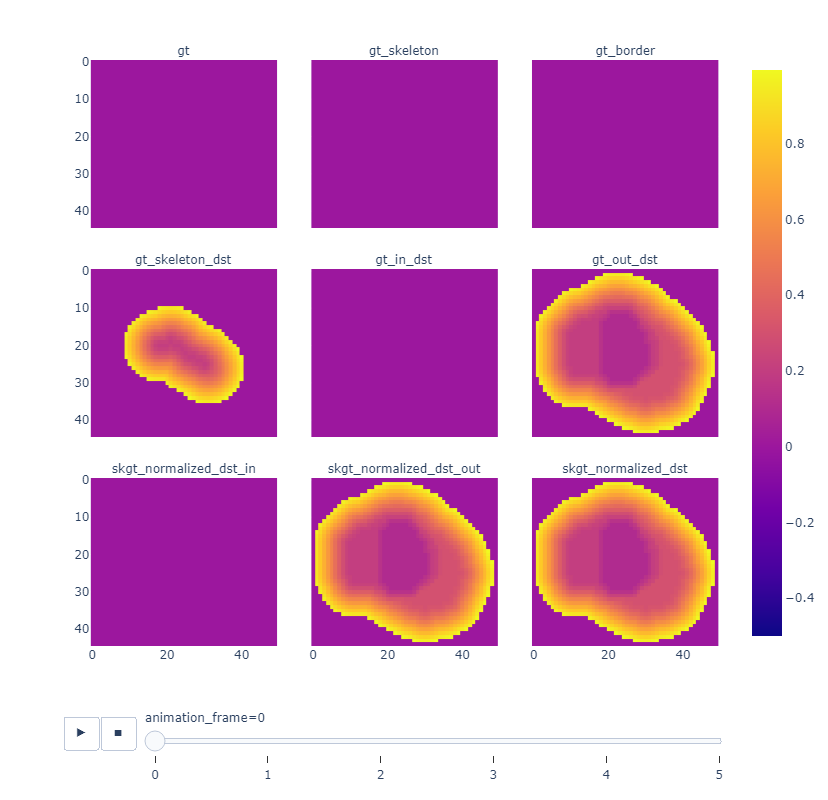

In [56]:
import myutils
data=np.array(list(f.values()))
data=myutils.array_trim(data,ignore=[0])
fig=px.imshow(data,animation_frame=3,facet_col=0,facet_col_wrap=3 ,width=800, height=800)
itemsmap={f'{i}':key for i, key in enumerate(f)}
fig.for_each_annotation(lambda a: a.update(text=itemsmap[a.text.split("=")[1]]))
# fig.write_html('a.html')
fig.show()


In [33]:
data.shape

(8, 45, 50, 3)

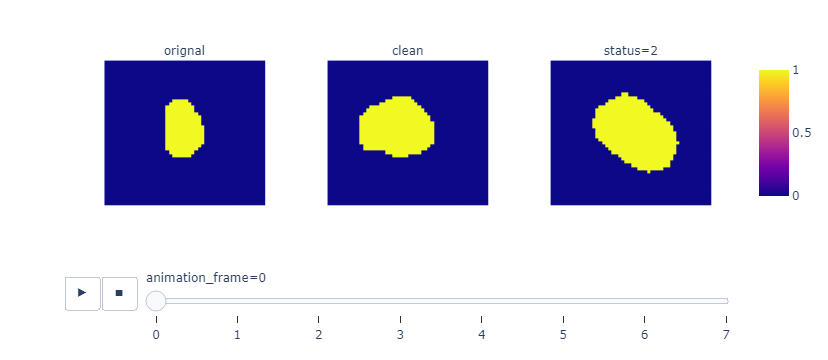

In [26]:
import plotly.express as px
from skimage import io
# data = io.imread("https://github.com/scikit-image/skimage-tutorials/raw/main/images/cells.tif")
# data = data.reshape((15, 4, 256, 256))[5:]
fig = px.imshow(data, animation_frame=0, facet_col=3,facet_col_wrap=3,labels={'facet_col' : 'status'} )

fig.update_xaxes(showticklabels=False).update_yaxes(showticklabels=False)

for i, label in enumerate(['orignal', 'clean']):
    fig.layout.annotations[i]['text'] = label

fig.show()

In [7]:
data.shape

(8, 45, 50, 3)

In [5]:
pip install tenacity

  Using cached tenacity-8.0.1-py3-none-any.whl (24 kB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# data.shape
data=np.clip(np.array(f),0,20)
fig=px.imshow(data,animation_frame=3,facet_col=0, )
fig.show()
fig.write_html('a.html')

In [ ]:
data=np.clip(np.array(f)[...,[15]],0,20)
fig=px.imshow(data,animation_frame=3,facet_col=0, )
fig.show()
# fig.write_html('a.html')

In [ ]:
print('a')
x={f'f{i}':f[i] for i in range(len(f))}
# np.asarray(list(x.values()))
data=np.clip(np.array(list(x.values()))[...,[15,16]],0,20)
# data.shape
fig=px.imshow(data,animation_frame=3,facet_col=0, )
for i, key in enumerate(x.keys()):
     fig.layout.annotations[i]['text'] = key
print('a')
fig.write_html('a.html')
fig.show()